# Haberman's Cancer Survival - Exploratory Data Analysis

In [ ]:
#Importing required packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; 

warnings.simplefilter('ignore')

In [ ]:
# Downaload the haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set
# Load haberman.csv into a pandas dataframe using pandas read_csv function

patients = pd.read_csv('haberman.csv')

In [3]:
# (Q) How many data-points and features
print(patients.shape)

(305, 4)


In [4]:
# (Q) What are columns name in your dataset ?
print(patients.columns)
print(patients.head())

Index(['30', '64', '1', '1.1'], dtype='object')
   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


<h3>Observations</h3>
    1. The dataset doesn't have column name.
    2. Need to add column name.
    3. Column names are describe in Kaggle metadata column tab as attribute information

In [5]:
# Adding column name as per attribute information in kaggle
patients = pd.read_csv('haberman.csv', header=None, names=['age', 'operation_year', 'positive_lymph_nodes', 'survival_status'])
print(patients.columns)
print(patients.head())

Index(['age', 'operation_year', 'positive_lymph_nodes', 'survival_status'], dtype='object')
   age  operation_year  positive_lymph_nodes  survival_status
0   30              64                     1                1
1   30              62                     3                1
2   30              65                     0                1
3   31              59                     2                1
4   31              65                     4                1


<h3>Observations</h3>
    1. First column shows age of the patients at the time of operation
    2. Second column shows about Operation_year i.e people operated in the year 19XX (inbetween 1958 to 1970).
    3. Third column shows about number of positive_lymph_nodes(the nodes which are responsible for cancer) i.e number of tumors found.
    4. Fourth column shows about Survival status of person after operation
        1 - Shows about the person survived 5 years or longer.
        2-  Shows about the person died in less than 5 years.

In [6]:
print(patients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                     306 non-null int64
operation_year          306 non-null int64
positive_lymph_nodes    306 non-null int64
survival_status         306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


<h3>Observations</h3>
    1. Number of rows 306 and columns 4
    2. There is no missing value in the dataset and all columns have numerical datatype

In [7]:
#(Q) How many data-points are present in each class is present ?
patients['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

<h3>Observations</h3>
    1. Haberman Dataset is an unbalanced dataset
    2. Out of 306 operations performed-
        a. 225 patients lived more than 5 year
        b. 81 patients lived less than 5 year

In [8]:
print(patients.describe())

              age  operation_year  positive_lymph_nodes  survival_status
count  306.000000      306.000000            306.000000       306.000000
mean    52.457516       62.852941              4.026144         1.264706
std     10.803452        3.249405              7.189654         0.441899
min     30.000000       58.000000              0.000000         1.000000
25%     44.000000       60.000000              0.000000         1.000000
50%     52.000000       63.000000              1.000000         1.000000
75%     60.750000       65.750000              4.000000         2.000000
max     83.000000       69.000000             52.000000         2.000000


<h3>Observations</h3>
    1. Age of the patients vary from 30 to 83 with average age of 52.
    2. Maximum number of positive lymph nodes observed is 52, nearly 75% have 4 positive lymph nodes and 25% have 0 positive    lymph nodes.

<h3>Objective:</h3>
<h4>To predict whether a patient will survive after 5 years or not based upon the patient's age, operation_year and the number of positive lymph nodes.</h4>

# Bivariate Analysis

<h2>2-D Scatter Plot</h2>

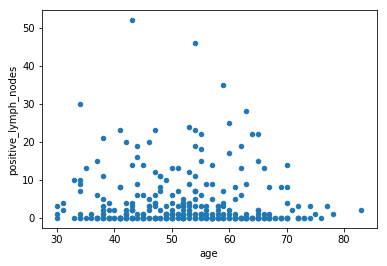

In [9]:
#lets plot plain scatter plot considering age and axillary nodes
patients.plot(kind='scatter', x='age', y='positive_lymph_nodes')
plt.show()

<strong>Observation</strong>: Most of data-points have zero positive lymphs

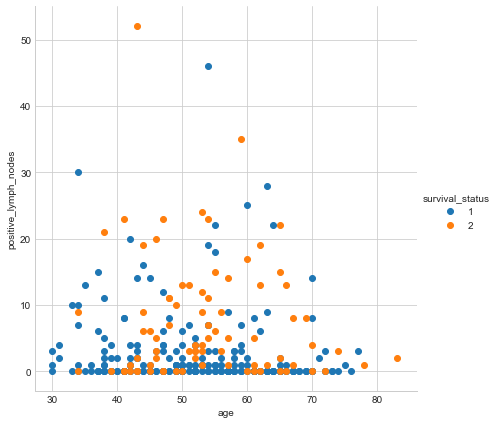

In [10]:
# 2-D Scatter plot with color-coding for each survival status (yes/no).
# Here 'sns' corresponds to seaborn.

sns.set_style("whitegrid");
sns.FacetGrid(patients, hue="survival_status", size=6) \
   .map(plt.scatter, "age", "positive_lymph_nodes") \
   .add_legend();
plt.show();

<h3>Observations</h3>
    1. Most patients have zero positive lymph nodes detected.
    2. Here we clearly see that blue data-points overlap with orange data-points.
    3. So, we didn't interpret or make any decision on the patirents survival from the above 2-D plot between age and 
       positive_lymph_nodes.
    4. We need to check the relation between all combination/pair of features to classify or make decision.
    5. Number of possible combination or pair features - 3C2 = 3 (excluding survival_status class)
    6. For these we have to use pair-plot

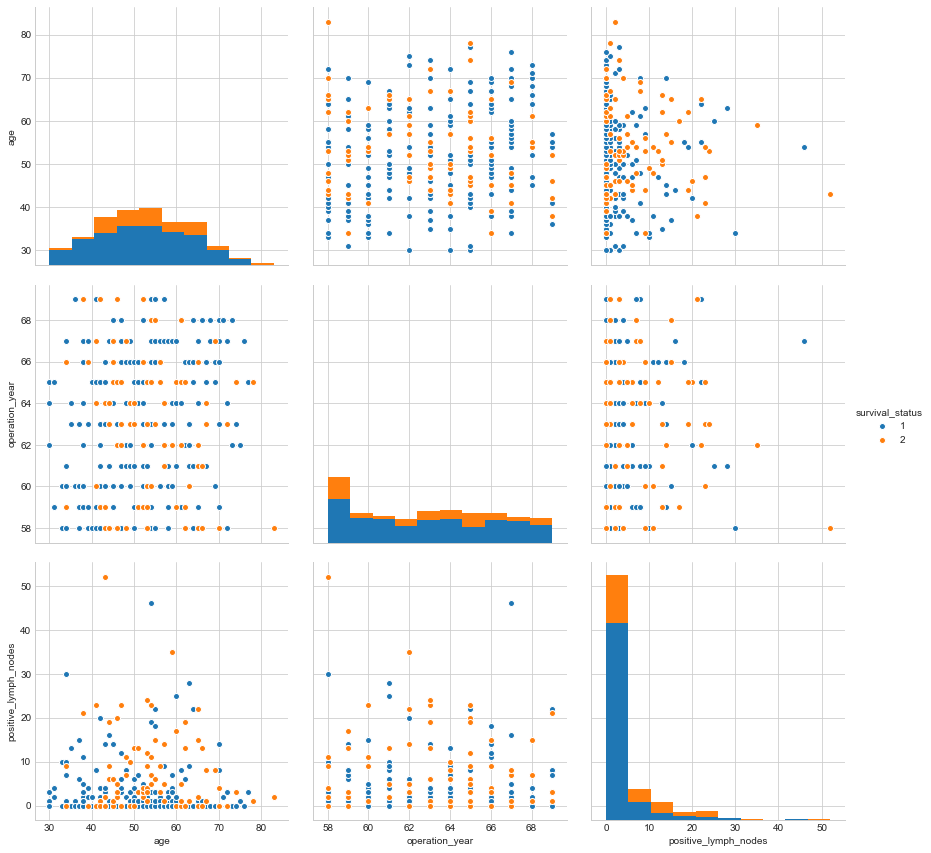

In [11]:
#Pairwise scatter plot: pair-plot
sns.set_style("whitegrid")
sns.pairplot(patients, hue="survival_status", vars=['age', 'operation_year' ,'positive_lymph_nodes'], size=4)
plt.show()

<h3>Observations</h3>
    1. In Age vs positive_lymph_nodes, we found some useful insights it shows that most patients who survived have zero 
       positive lymph
    2. It looks difficult to get insights from rest of the plots as most data-points are overlapped. 

# Univariate Analysis

<h2> Histogram, PDF </h2>

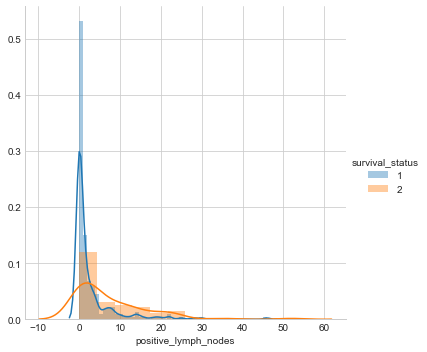

In [12]:
#Plot PDF and Histogram
sns.FacetGrid(patients, hue="survival_status", size=5) \
    .map(sns.distplot, "positive_lymph_nodes") \
    .add_legend()
plt.show()

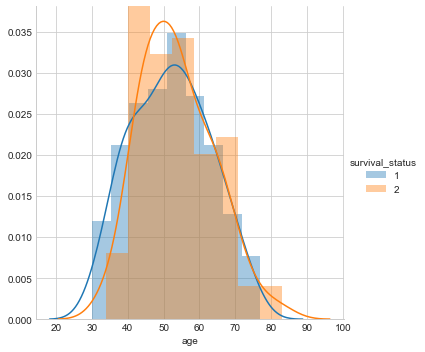

In [13]:
sns.FacetGrid(patients, hue="survival_status", size=5) \
    .map(sns.distplot, "age") \
    .add_legend()
plt.show()

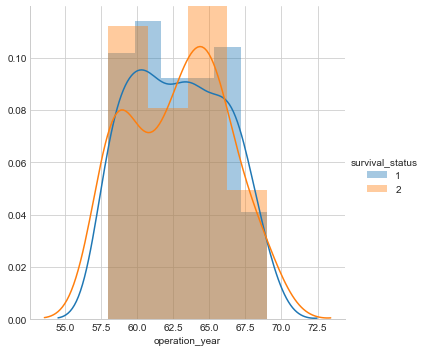

In [14]:
sns.FacetGrid(patients, hue="survival_status", size=5) \
    .map(sns.distplot, "operation_year") \
    .add_legend()
plt.show()

<h3> Observations </h3>
    1. From above PDFs we found that "age" and "operation_year" is not a useful features to find insights because the
       distribution is similar for both live and dead patients
    2. "positive_lymph_nodes" is the only feature which shows some useful insights as there is a differnce between the  
       distribution of both classes/labels. More patients survied who have zero number of positive lymph nodes.
    3. From "operation_year" distribution, we observed that patients who didn't survive suddenly rise and fallen in year 1958
       and 1960. Maximum patients not survived in the operation year of 1965.

# CDF

In [15]:
# divide the survival_status class/labels into two categories
# surivied = status 1 and not_survived = status 2

survived = patients.loc[patients['survival_status'] == 1]
not_survived =  patients.loc[patients['survival_status'] == 2]

******************** positive_lymph_nodes ******************
Bin: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
************************************************************


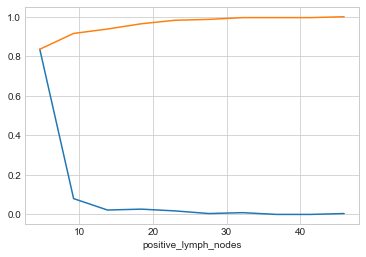

In [16]:
counts, bin_edge = np.histogram(survived["positive_lymph_nodes"], bins=10, density=True)
pdf = counts/ (sum(counts))
cdf = np.cumsum(pdf)
print("******************** {} ******************".format("positive_lymph_nodes"))
print("Bin: {}".format(bin_edge))
print("PDF: {}".format(pdf))
print("CDF: {}".format(cdf))
print("*"*60)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.xlabel("positive_lymph_nodes")
plt.show()

******************** age ******************
Bin: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
CDF: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
************************************************************


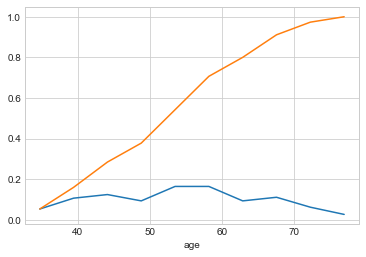

In [17]:
counts, bin_edge = np.histogram(survived["age"], bins=10, density=True)
pdf = counts/ (sum(counts))
cdf = np.cumsum(pdf)
print("******************** {} ******************".format("age"))
print("Bin: {}".format(bin_edge))
print("PDF: {}".format(pdf))
print("CDF: {}".format(cdf))
print("*"*60)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.xlabel("age")
plt.show()

******************** operation_year ******************
Bin: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
CDF: [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
************************************************************


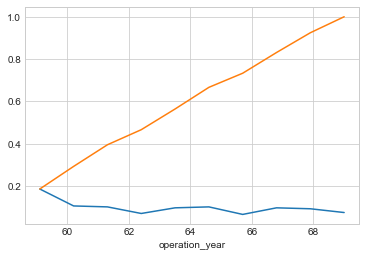

In [18]:
counts, bin_edge = np.histogram(survived["operation_year"], bins=10, density=True)
pdf = counts/ (sum(counts))
cdf = np.cumsum(pdf)
print("******************** {} ******************".format("operation_year"))
print("Bin: {}".format(bin_edge))
print("PDF: {}".format(pdf))
print("CDF: {}".format(cdf))
print("*"*60)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.xlabel("operation_year")
plt.show()

In [19]:
#performing summary statistics below to get an idea to distinguish between the survival and not survival.

# Mean, variance, standard-deviation

In [20]:
print("Statics summary analysis for people who survived for more than 5 years")
survived.describe()

Statics summary analysis for people who survived for more than 5 years


,age,operation_year,positive_lymph_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [21]:
print("Statics summary analysis for people who not survived for more than 5 years")
not_survived.describe()

Statics summary analysis for people who not survived for more than 5 years


,age,operation_year,positive_lymph_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


<h3>Observations</h3>
    1. From both tables we observed that all the statistics features look similar except positive_lymph_nodes.
    2. The mean of patients who didn't survived more than 5 year is more than patients who survived for more than 5 year.

#  Median, Percentile, Quantile, IQR, MAD

In [22]:
#Median, Quantiles, Percentiles, IQR.#Median, 
print("\nMedians:")
print(np.median(survived["positive_lymph_nodes"]))
#Median with an outlier
print(np.median(np.append(survived["positive_lymph_nodes"],50)));
print(np.median(not_survived["positive_lymph_nodes"]))

print("\nQuantiles:")
print(np.percentile(survived["positive_lymph_nodes"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["positive_lymph_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survived["positive_lymph_nodes"],90))
print(np.percentile(not_survived["positive_lymph_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived["positive_lymph_nodes"]))
print(robust.mad(not_survived["positive_lymph_nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Box Plot and Whiskers

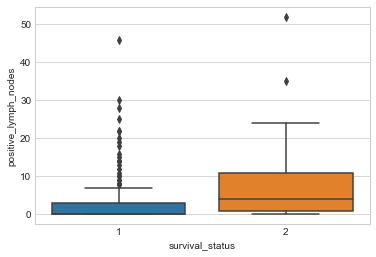

In [23]:
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""

sns.boxplot(x="survival_status", y="positive_lymph_nodes", data=patients)
plt.show()

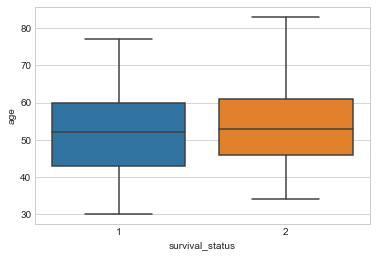

In [24]:
sns.boxplot(x='survival_status', y='age', data=patients)
plt.show()

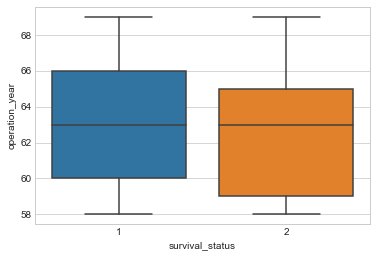

In [25]:
sns.boxplot(x='survival_status', y='operation_year', data=patients)
plt.show()

# Violin Plot

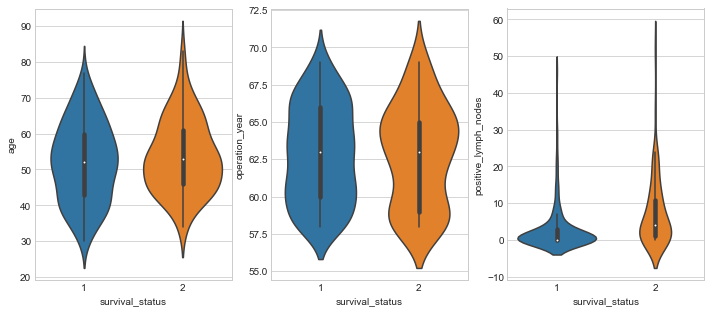

In [26]:
# Violin plot is the combination of box plot and probability density function.
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for idx, feature in enumerate(list(patients.columns)[:-1]):
    sns.violinplot(x='survival_status', y = feature, data=patients, ax=axes[idx])
plt.show()

<h3>Observations</h3>
    1. The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
    2. Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
    3. From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 
       59-65 and the patients who survived have age between 42-60, year between 60-66.

# Contour Plot

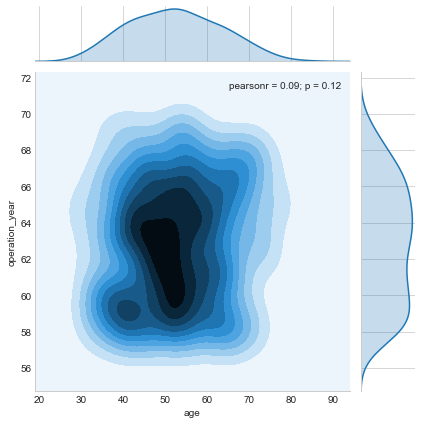

In [27]:
sns.jointplot(x="age", y="operation_year", data=patients, kind="kde");
plt.show()

<strong>Observation:</strong> There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 42 - 60.

# Final Conclusions

    1. There are 4 features with 306 data-points/observation for each feature.
    2. There is no missing value in the dataset and all columns have numerical datatype 
    3. This dataset is an unbalanced dataset. Out of 306 operations performed-
        a. 225 patients have survival status 1, who lived for more than 5 year
        b. 81 patients have survival status 2, who lived for less than 5 year